<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0ID4EN39446790-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Identify Stop Signs with Transfer Learning**


Estimated time needed: **25** minutes


<h1> Should the car stop? </h1>


As part of the machine learning team for a corporation developing self-driving cars, you are working on a new stop sign detection technology. In order to determine if there is a stop sign when the car is on the road, your team proposes to capture snapshots every second, signaling the car to stop when there's a stop sign detected in the image. 

Then, you encounter a problem: there's too many images to train on! It's computationally expensive to train on so many images every time. Enter **transfer learning** - a technique in which you take advantage of existing trained models for a more general task, say image classification. You can then train on a smaller, more specific dataset (i.e. images containing stop signs and those that don't) to reduce training time.

In this guided project, you will implement transfer learning for stop sign detection.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0ID4EN/car_stop_sign.jpeg" width="600" alt="car going past a stop sign">
<center>

Note: training the model may take a long time if the number of epochs is big. Moreover as this takes up memory, the kernel in SN Labs might not be able to run all three pre-trained models without restarting.


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
    </li>
    <li>
        <a href="https://#Background">Background</a>
        <ol>
            <li><a href="https://#What is transfer learning?">What is transfer learning?</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Use Transfer Learning for Identifying Stop Signs">Use Transfer Learning for Identifying Stop Signs</a>
            <ol>
            <li><a href="https://#Loading images">Loading images</a></li>
            <li><a href="https://#Defining a helper function">Defining a helper function</a></li>
            <li><a href="https://#Pre-trained Model 1: Incepton-v3">Pre-trained Model 1: Incepton-v3</a></li>
            <li><a href="https://#Pre-trained Model 2: MobileNet">Pre-trained Model 2: MobileNet</a></li>
            <li><a href="https://#Pre-trained Model 3: ResNet-50">Pre-trained Model 3: ResNet-50</a></li>
         </ol>
        </li>
</ol>


## Objectives

After completing this guided project you will be able to:

*   **Perform** pre-processing and image augmentation on ImageGeneratorClass objects in Keras.
*   **Implement** transfer learning in five general steps:
    *   obtain pre-trained model,
    *   create base model,
    *   freeze layers,
    *   train new layers on dataset,
    *   improve model through fine tuning.
*   **Build** an end-to-end transfer learning model (Incepton-v3, MobileNet, ResNet-50) for a binary image classification task.


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`tensorflow`](https://www.tensorflow.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and neural network related functions.


### Installing Required Libraries

The following installations and upgrades of libraries are needed for running this guided project. **RESTART the kernel after you finish running the commands**.


In [1]:
%%capture
!pip install tensorflow_datasets
!pip install --upgrade tensorflow
!pip install opendatasets
!pip install --upgrade skillsnetwork

### Importing Required Libraries


In [1]:
import numpy as np
import datetime
import os
import random, shutil
import glob
import skillsnetwork

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.image import imread

from os import makedirs,listdir
from shutil import copyfile
from random import seed
from random import random
import keras 
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from sklearn import metrics

import opendatasets as od

sns.set_context('notebook')
sns.set_style('white')

2023-02-16 20:47:59.749854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 20:48:00.297727: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 20:48:00.297800: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-16 20:48:02.094388: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.0


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


## Background


### What is transfer learning?


Most popular models are difficult to train from scratch as they require huge datasets (like ImageNet), a large number of training iterations and  very heavy computing machinery. The basic features (edges, shapes) learned by early layers in a network are generalizable. While the later layers in an already trained network tend to capture features that are more particular to a specific image classification task.

**Transfer learning** uses the idea that if we keep the early layers of a pre-trained network, and re-train the later layers on a specific dataset, we might be able to leverage some state of that network on a related task.


A typical transfer learning workflow in Keras looks something like this:

1.  Initialize base model, and load pre-trained weights (e.g. ImageNet)
2.  "Freeze" layers in the base model by setting `training = False`
3.  Define a new model that goes on top of the output of the base model's layers.
4.  Train resulting model on your data set.


## Use Transfer Learning for Identifying Stop Signs

Other than VGG-16, there are many state-of-the-art CNN architectures we could explore, such as **InceptionNet, MobileNet, ResNet, Xception**, etc. There are more than two dozen pre-trained models available from Keras that we could use directly for transfer learning. In this example, we will implement some of them for distinguishing Stop signs.

The stop sign datasets will be downloaded using the following cells. Compared to a typical dataset of images, the stop sign dataset is relatively small as it only contains around 200 training images and 8 test images. This is when transfer learning should come to rescue, because training models from scratch would require a lot of data, otherwise you will likely overfit your model.


### Loading images


Uncomment the following cell to download the data files and unzip them.


In [2]:
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/dataset/stop.zip",
                           overwrite=True)
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/dataset/not_stop.zip",
                           overwrite=True)
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/dataset/test_set_stop_not_stop.zip",
                           overwrite=True)

  0%|          | 0/197 [00:00<?, ?it/s]

Saved to '.'


  0%|          | 0/203 [00:00<?, ?it/s]

Saved to '.'


  0%|          | 0/19 [00:00<?, ?it/s]

Saved to '.'


#### Creating image directories

We will rearange the image directories as follows:

```python
signs/
└── train
    ├── stop
    └── not_stop
└── test
    ├── stop
    └── not_stop
```

We will have a train and a test directory, each contains images that have stop signs and those that don't. This setup of directories will be handy when we use the `flow_from_directory` function later to build data generators.


In [3]:
dataset_home = 'signs/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['stop/', 'not_stop/']
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        makedirs(newdir, exist_ok = True)

#### Moving images

Let's move the images according to the map above.


In [4]:
for file in listdir("stop"):
    if file != '.DS_Store':
        shutil.copyfile(f"stop/{file}", f"signs/train/stop/{file}")

for file in listdir("not_stop"):
    if file != '.DS_Store':
        shutil.copyfile(f"not_stop/{file}", f"signs/train/not_stop/{file}")

test_path = "test_set_stop_not_stop/"
for file in listdir(test_path):
    if file.startswith("stop"):
        shutil.copyfile(test_path+file, f"signs/test/stop/{file}")
    elif file.startswith("not_stop"):
        shutil.copyfile(test_path+file, f"signs/test/not_stop/{file}")

#### Displaying raw images

Use the following code to display the first 5 images in the train set that have stop signs and the first 5 images that don't have stop signs.


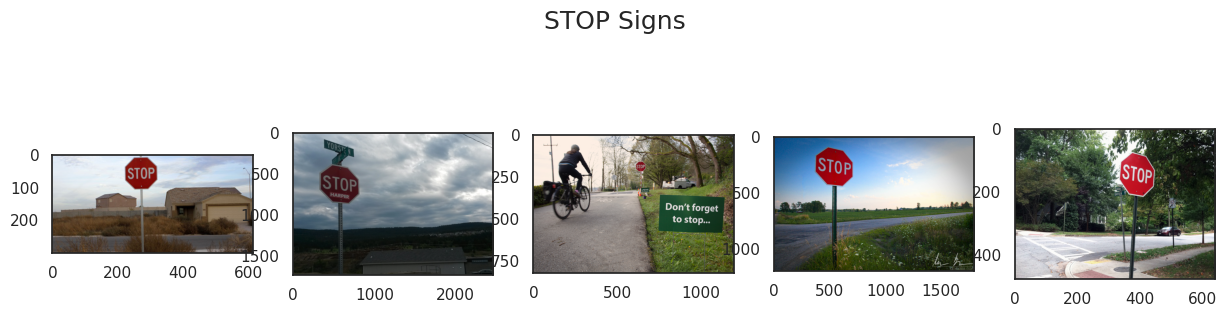

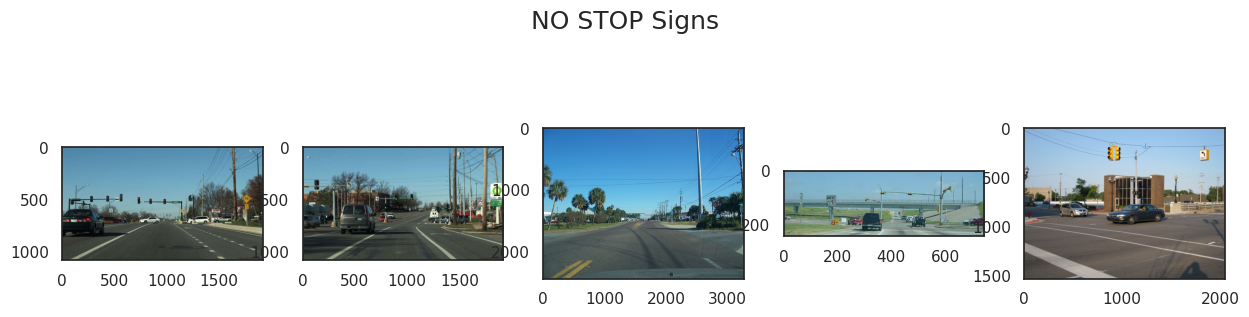

In [5]:
train_stop = glob.glob('./signs/train/stop/*')
train_not_stop = glob.glob('./signs/train/not_stop/*')

fig1, ax1 = plt.subplots(1,5,figsize=(15,4))
fig1.suptitle("STOP Signs", fontsize=18)
l1 = [ax1[i].imshow(imread(train_stop[i])) for i in range(5)]

fig2, ax2 = plt.subplots(1,5,figsize=(15,4))
fig2.suptitle("NO STOP Signs", fontsize=18)
l2 = [ax2[i].imshow(imread(train_not_stop[i])) for i in range(5)]

#### Building image data generators

We will build image data generators that perform real-time image augmentation while returning batches of image data. We will apply image augmentation on the training data only. We use a validation split of 0.2 and a batch size of 30.


In [6]:
path = "signs/train/"
labels = ['stop', 'not_stop']
seed = 123
batch_size = 30
target_size = (160, 160)

In [7]:
train_datagen = ImageDataGenerator(validation_split=0.2,
                                  rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(validation_split=0.2,
                                  rescale=1./255.)

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory = path,
    classes = labels,
    seed = seed,
    batch_size = batch_size, 
    class_mode='binary',
    shuffle = True,
    target_size=target_size,
    subset = 'training'
)

val_generator = val_datagen.flow_from_directory(
    directory = path,
    classes = labels,
    seed = seed,
    batch_size = batch_size, 
    class_mode='binary',
    shuffle = True,
    target_size=target_size,
    subset = 'validation'
)

Found 158 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [9]:
print(train_generator.class_indices)

prob2class = lambda x: 'Stop' if x < 0.5 else 'Not Stop' 

{'stop': 0, 'not_stop': 1}


For our test images, we convert them into numpy arrays with pixel values scaled to 0-1. The test data will not be seen by the model during training or validation, but they will be used to evaluate the predictive power of our model at the end.


In [10]:
from sklearn.utils import shuffle

test_files = glob.glob('signs/test/stop/*.jpeg') + glob.glob('signs/test/not_stop/*.jpeg')
test_files = shuffle(test_files)

test_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=target_size)) for img in test_files]
test_imgs = np.array(test_imgs).astype('int')

# Standardize
test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

### Defining a helper function for building, compiling, and fitting CNNs


In [11]:
def build_compile_fit(basemodel):
    
    # flatten the output of the base model
    x = Flatten()(basemodel.output)
    # add a fully connected layer 
    x = Dense(1024, activation='relu')(x)
    # add dropout layer for regularization
    x = Dropout(0.2)(x)
    # add final layer for classification
    x = Dense(1, activation='sigmoid')(x)

    model = Model(basemodel.input, x)
    model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0001),
                                                       loss='binary_crossentropy',
                                                       metrics=['accuracy'])
    callbacks = [EarlyStopping(monitor = 'loss', 
                    patience = 5, 
                    mode = 'min', 
                    min_delta=0.01)]

    model.fit(train_generator,
              validation_data = val_generator,
              steps_per_epoch=5, # num of batches in one epoch
              epochs=10,
              callbacks=callbacks)
    
    return model

### Pre-trained Model 1: Inception-v3


**Inception-v3** is a successor to Inception-v1 with 24 million parameters and ran 48 layers deep.

Instead of focusing on increasing the depth of the network, InceptionNet focuses on increasing the width and depth of the model simultaneously to attain better accuracy, while keeping the computing resources constant.

It focuses on **parallel processing** and extraction of various feature maps concurrently using **Inception modules**, which are collections of convolutions with different filter sizes and pooling operations. The following is an illustration of the inception module in inception-v1 architecture:

<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L2/img/Inception_v1_module.png"></center>

Picture credits to [Wichai Puarungroj](https://www.researchgate.net/profile/Wichai-Puarungroj-2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)

The inception architecture was refined in various ways, specifically for inception-v3, the following improvements are incorporated to achieve less expensive and still efficient network:

*   Factorization Into Smaller Convolutions
*   Factorization Into Asymmetric Convolutions
*   Auxiliary Classifier used as regularizer
*   Efficient Grid Size Reduction

You can read more about the different versions of InceptionNet [here](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)


Let's import the pre-trained Inception-v3 architecture from keras applications for our transfer learning task:


In [12]:
from keras.applications.inception_v3 import InceptionV3

# initialize the base model
basemodel = InceptionV3(input_shape=(160, 160,3),
                          include_top = False,
                          weights = 'imagenet')

for layer in basemodel.layers:
    layer.trainable = False

# call the build_compile_fit function to complete model training
inception_v3 = build_compile_fit(basemodel)

2023-02-16 20:50:26.983645: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-16 20:50:26.983764: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-16 20:50:26.983863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-u123nikosgar): /proc/driver/nvidia/version does not exist
2023-02-16 20:50:26.984476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/10
5/5 [==============================] - 52s 10s/step - loss: 7.3260 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.6667
Epoch 2/10
5/5 [==============================] - 39s 8s/step - loss: 1.1250 - accuracy: 0.6600 - val_loss: 0.3221 - val_accuracy: 0.8974
Epoch 3/10
5/5 [==============================] - 39s 8s/step - loss: 0.6762 - accuracy: 0.7656 - val_loss: 1.0502 - val_accuracy: 0.7949
Epoch 4/10
5/5 [==============================] - 36s 8s/step - loss: 1.3532 - accuracy: 0.6562 - val_loss: 0.2993 - val_accuracy: 0.8718
Epoch 5/10
5/5 [==============================] - 35s 7s/step - loss: 0.4813 - accuracy: 0.8125 - val_loss: 0.2052 - val_accuracy: 0.9231
Epoch 6/10
5/5 [==============================] - 37s 9s/step - loss: 1.1884 - accuracy: 0.6797 - val_loss: 0.5592 - val_accuracy: 0.8462
Epoch 7/10
5/5 [==============================] - 34s 8s/step - loss: 0.5158 - accuracy: 0.8281 - val_loss

The pre-trained part of our **inception_v3** model utilizes the weights obtained from the imagenet dataset training. Only the layers that we added are trained on the stop signs data.

_Note: This step may take long to run due to a large number of epochs._


Let's now display the test images along with their class labels predicted by the fitted **inception_v3**:


1/1 [==============================] - 0s 255ms/step


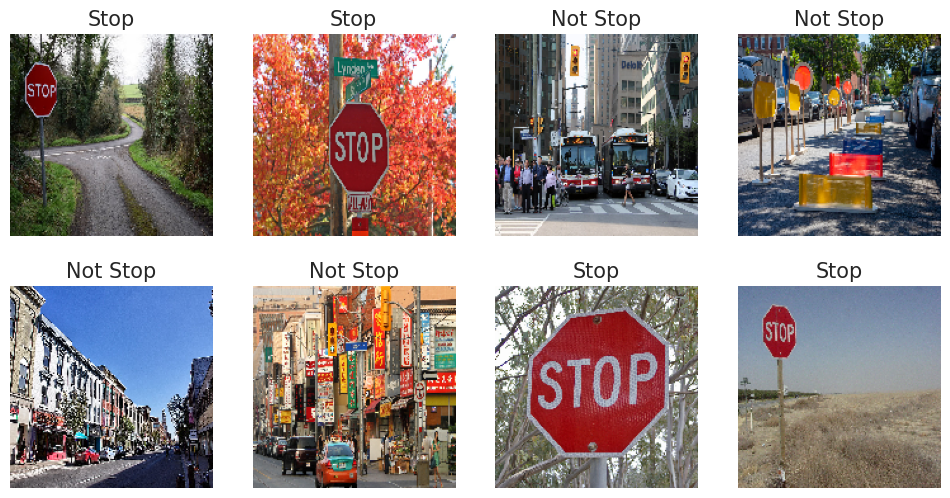

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

for i, ax in enumerate(ax.flat):
    ax.imshow(test_imgs[i])
    pred_class = prob2class(inception_v3.predict(test_imgs_scaled[i].reshape(1, 160, 160,3)))
    
    # print the predicted class label as the title of the image
    ax.set_title(pred_class, fontsize=15)
    ax.axis("off")

### Pre-trained Model 2: MobileNet


**MobileNets** are very efficient and small deep learning architectures specially designed for mobile devices.

It makes use of a new kind of convolution layer, known as **Depthwise Separable convolution**. The main difference between a 2D convolution and a Depthwise convolution is that, the former is performed over multiple input channels by doing weighted sum of the input pixels with the filter, whereas the latter is performed separately over each channel.

For example, if the input image has three channels then the output of depthwise separable convolution will also have three channels. The next step is **Pointwise convolution**, which is similar to a regular convolution with a $1\times1$ filter. By doing so, we can again merge the three channels from depthwise separable convolution into one to creare new features.


Let's import the pre-trained MobileNet architecture from keras applications for our transfer learning task:


In [14]:
from keras.applications.mobilenet import MobileNet

# initialize the base model
basemodel = MobileNet(input_shape=(160, 160,3),
                          include_top = False,
                          weights = 'imagenet')

for layer in basemodel.layers:
    layer.trainable = False
    
# call the build_compile_fit function to complete model training
mobile_net = build_compile_fit(basemodel)

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/10
5/5 [==============================] - 36s 7s/step - loss: 6.2885 - accuracy: 0.5667 - val_loss: 0.5428 - val_accuracy: 0.8974
Epoch 2/10
5/5 [==============================] - 27s 6s/step - loss: 0.6285 - accuracy: 0.8203 - val_loss: 0.2070 - val_accuracy: 0.8974
Epoch 3/10
5/5 [==============================] - 28s 6s/step - loss: 0.4703 - accuracy: 0.8594 - val_loss: 0.3879 - val_accuracy: 0.8462
Epoch 4/10
5/5 [==============================] - 26s 5s/step - loss: 0.2229 - accuracy: 0.9141 - val_loss: 0.1541 - val_accuracy: 0.9487
Epoch 5/10
5/5 [==============================] - 27s 5s/step - loss: 0.6761 - accuracy: 0.8359 - val_loss: 0.8120 - val_accuracy: 0.6154
Epoch 6/10
5/5 [==============================] - 28s 6s/step - loss: 0.4328 - accuracy: 0.8867 - val_loss: 0.3629 - val_accuracy: 0.8205
Epoch 7/10
5/5 [==============================] - 27s 5s/step - loss: 0.2840 - accuracy: 0.8828 - val_loss:

Let's display the test images along with the their class labels predicted by the fitted **mobile_net**:


1/1 [==============================] - 0s 131ms/step


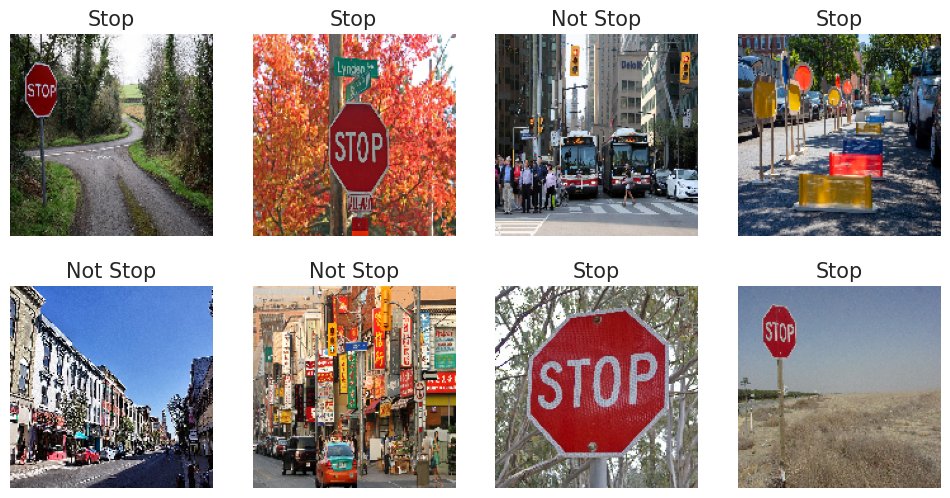

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

for i, ax in enumerate(ax.flat):
    ax.imshow(test_imgs[i])
    pred_class = prob2class(mobile_net.predict(test_imgs_scaled[i].reshape(1, 160, 160,3)))
    
    # print the predicted class label as the title of the image
    ax.set_title(pred_class, fontsize=15)
    ax.axis("off")

### Pre-trained Model 3: ResNet-50


**ResNet** features special skip connections which add the output from an earlier layer directly to a later layer and a heavy use of batch normalization. It allows us to design deep CNNs without compromising the model’s convergence and accuracy. The basic building blocks for ResNets is the convolution and identity blocks.

Essentially, ResNet uses the network layers to fit a residual mapping $F(x) + x$, instead of trying to learn the desired underlying mapping $H(x)$ directly with stacked layers.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L2/img/resnet.png" width="30%"></center>

The formulation of $F(x) + x$ can be realized by the feedforward neural networks with **shortcut connections**. Shortcut connections add the output from previous layer directly to the output of the current layer, which can be seen as **identity mapping**.

By doing so, the network overcomes the vanishing gradient problem because now the gradient signals could travel back to early layers through this shortcut.


Similarly, let's import the pre-trained ResNet-50 architecture from keras applications.


In [16]:
from keras.applications import ResNet50

# initialize the base model
basemodel = ResNet50(input_shape=(160, 160,3),
                          include_top = False,
                          weights = 'imagenet')

for layer in basemodel.layers:
    layer.trainable = False

# call the build_compile_fit function to complete model training
resnet_50 = build_compile_fit(basemodel)

94765736/94765736 [==============================] - 1s 0us/step


2023-02-16 21:01:56.446821: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 209715200 exceeds 10% of free system memory.
2023-02-16 21:01:57.190040: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 209715200 exceeds 10% of free system memory.
2023-02-16 21:01:57.554090: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 209715200 exceeds 10% of free system memory.


Epoch 1/10


2023-02-16 21:02:02.410215: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 209715200 exceeds 10% of free system memory.
2023-02-16 21:02:05.816069: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 209715200 exceeds 10% of free system memory.


5/5 [==============================] - 68s 12s/step - loss: 2.3863 - accuracy: 0.4766 - val_loss: 1.4087 - val_accuracy: 0.4872
Epoch 2/10
5/5 [==============================] - 59s 13s/step - loss: 0.8042 - accuracy: 0.5547 - val_loss: 0.7587 - val_accuracy: 0.4872
Epoch 3/10
5/5 [==============================] - 58s 13s/step - loss: 0.9916 - accuracy: 0.4922 - val_loss: 0.7767 - val_accuracy: 0.4872
Epoch 4/10
5/5 [==============================] - 61s 12s/step - loss: 0.8922 - accuracy: 0.5156 - val_loss: 0.7497 - val_accuracy: 0.4872
Epoch 5/10
5/5 [==============================] - 60s 12s/step - loss: 1.0619 - accuracy: 0.4297 - val_loss: 0.8284 - val_accuracy: 0.5128
Epoch 6/10
5/5 [==============================] - 57s 13s/step - loss: 0.9868 - accuracy: 0.4219 - val_loss: 0.8901 - val_accuracy: 0.5128
Epoch 7/10
5/5 [==============================] - 58s 12s/step - loss: 0.7489 - accuracy: 0.5312 - val_loss: 1.1485 - val_accuracy: 0.5128
Epoch 8/10
5/5 [======================

Let's display the test images along with their class labels predicted by **resnet\_50**:


1/1 [==============================] - 0s 420ms/step


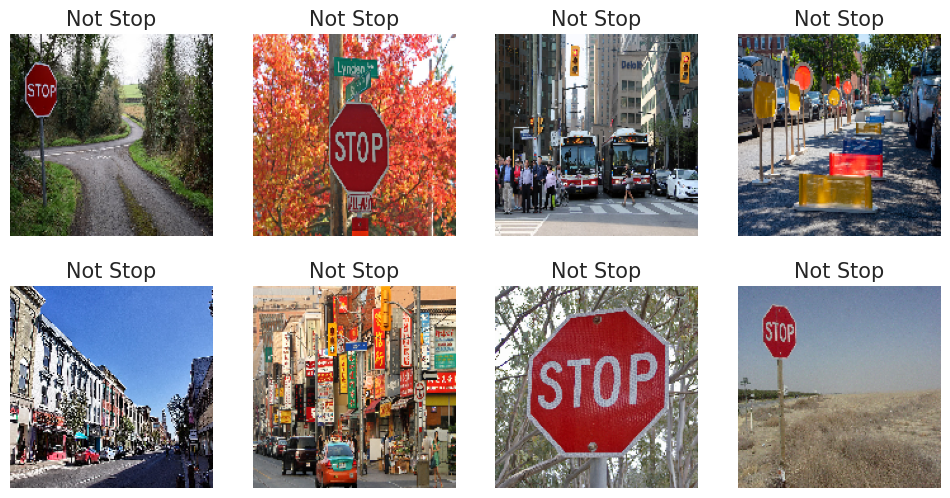

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

for i, ax in enumerate(ax.flat):
    ax.imshow(test_imgs[i])
    pred_class = prob2class(resnet_50.predict(test_imgs_scaled[i].reshape(1, 160, 160,3)))
    # print the predicted class label as the title of the image
    ax.set_title(pred_class, fontsize=15)
    ax.axis("off")

You probably saw that the predictions of the pre-trained CNN architectures were not very accurate. In this guided project, we mainly want to demonstrate to you the possibility of using different architectures for your transfer learning tasks. 

For better performance of each, we suggest you apply fine-tuning by adding more custom layers on top of the base model to allow the latter layers to learn more information from the data they are trained on or fine-tuned on.


## Custom image: Is it a stop sign?


Once you get a model with satisfactory performance, you can predict the class of a custom image that you upload! (Of course, you can use the existing models we explored in this project, but it just might not be accurate enough to use on self driving cars🚗)

In the code snippet provided, imply change the file path (`FILE_PATH_TO_YOUR_IMAGE`) to your custom image and the name for the model object(`MODEL_NAME`), and it will return the class prediction:
```python
# Load the original image and resize it to IMG_DIM
IMG_DIM = (160,160)
orig_im = tf.keras.preprocessing.image.load_img("FILE_PATH_TO_YOUR_IMAGE", target_size=IMG_DIM)
plt.imshow(orig_im)

# Convert to array and rescale the image values
custom_im = tf.keras.preprocessing.image.img_to_array(orig_im)
custom_im_scaled = custom_im.astype('float32')
custom_im_scaled /= 255

# Predict the waste category
prob2class(MODEL_NAME.predict(custom_im_scaled.reshape((1,
                                                       IMG_DIM[0],
                                                       IMG_DIM[1],
                                                       3)), verbose=0))
```

An example is given below using an image from the test set predicted with resnet_50:


'Not Stop'

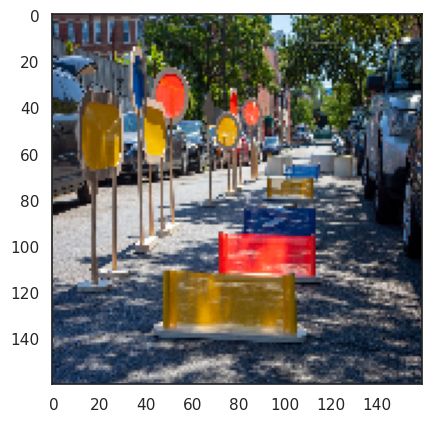

In [18]:
# Load the original image and resize it to IMG_DIM
IMG_DIM = (160,160)
orig_im = tf.keras.preprocessing.image.load_img("signs/test/not_stop/not_stop_3.jpeg", target_size=IMG_DIM)
plt.imshow(orig_im)

# Convert to array and rescale the image values
custom_im = tf.keras.preprocessing.image.img_to_array(orig_im)
custom_im_scaled = custom_im.astype('float32')
custom_im_scaled /= 255

# Predict the waste category
prob2class(resnet_50.predict(custom_im_scaled.reshape((1,
                                                       IMG_DIM[0],
                                                       IMG_DIM[1],
                                                       3)), verbose=0))